### NAMA: MUHAMMAD NAUFAL IHSAN MAULIDIN
### NIM: 2109106034
### KELAS: INFORMATIKA A2 2021

### DATASET YANG DIGUNAKAN: [TF_Binary_Alpha_Digits](https://www.tensorflow.org/datasets/catalog/binary_alpha_digits)

#### IMPORT LIBRARY YANG DIGUNAKAN

In [4]:
import tensorflow as tf

In [5]:
from tensorflow.keras import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Dense
import tensorflow_datasets as datatensor
import numpy as np

#### SPLIT DATA MENJADI TRAIN DAN TEST SEKALIGUS MENGIMPORT DATASET

In [6]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datatensor.load(
    "binary_alpha_digits",
    split = ["train[:70%]", "train[:30%]"],
    batch_size = -1,
    as_supervised = True
    )

#### ENCODING LABEL PADA DATASET

In [97]:
y_train = keras.utils.to_categorical(y_train_raw, 36)
y_test = keras.utils.to_categorical(y_test_raw, 36)

#### IMPORT LIBRARY MATPLOTLIB UNTUK MENAMPILKAN ISI GAMBAR DARI DATASET YANG DIGUNAKAN

In [98]:
import matplotlib.pyplot as plt

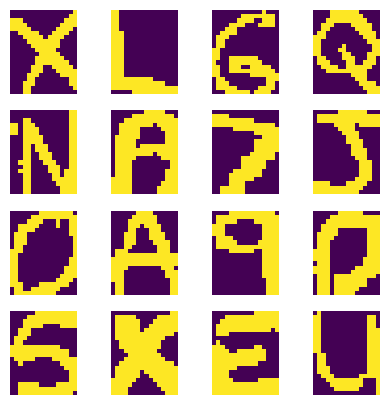

In [99]:
plt.figure(figsize = (5,5))
for i in range (16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train_raw[i])
    plt.axis("off")
plt.show()

#### MENAMPILKAN SHAPE DARI DATASET

In [100]:
x_train_raw.shape

TensorShape([983, 20, 16, 1])

In [101]:
x_test_raw.shape

TensorShape([421, 20, 16, 1])

#### MELAKUKAN RESIZE PADA GAMBAR DATASET

In [111]:
datatraining = tf.image.resize(x_train_raw, (28,28))
datatesting = tf.image.resize(x_test_raw, (28,28))

#### MELAKUKAN RESHAPE PADA GAMBAR DATASET

In [112]:
datatraining = np.reshape(datatraining, (983, 784))
datatesting = np.reshape(datatesting, (421, 784))

#### MEMBUAT MODEL SEQUENTIAL DARI DATASET

In [144]:
modeldata = Sequential([
        Dense(512, activation = 'relu', input_dim = (784)),
        Dense(256, activation = 'relu'),
        Dense(36, activation = 'softmax')
    ])

In [145]:
modeldata.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 512)               401920    
                                                                 
 dense_45 (Dense)            (None, 256)               131328    
                                                                 
 dense_46 (Dense)            (None, 36)                9252      
                                                                 
Total params: 542,500
Trainable params: 542,500
Non-trainable params: 0
_________________________________________________________________


#### MELAUKAN COMPILE TERHADAP MODEL

In [146]:
modeldata.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics=['accuracy'])

#### MELAKUKAN TRAINING MODEL DENGAN EPOCHS SEBANYAK 30

In [140]:
history = modeldata.fit(
    datatraining, 
    y_train, 
    batch_size = 64, 
    epochs = 30, 
    validation_data = (datatesting, y_test)
)

Epoch 1/30
16/16 [==============================] - 0s 8ms/step - loss: 0.1332 - accuracy: 0.9766 - val_loss: 0.1312 - val_accuracy: 0.9786
Epoch 2/30
16/16 [==============================] - 0s 5ms/step - loss: 0.1293 - accuracy: 0.9797 - val_loss: 0.1279 - val_accuracy: 0.9786
Epoch 3/30
16/16 [==============================] - 0s 5ms/step - loss: 0.1305 - accuracy: 0.9746 - val_loss: 0.1279 - val_accuracy: 0.9739
Epoch 4/30
16/16 [==============================] - 0s 5ms/step - loss: 0.1292 - accuracy: 0.9776 - val_loss: 0.1296 - val_accuracy: 0.9762
Epoch 5/30
16/16 [==============================] - 0s 5ms/step - loss: 0.1314 - accuracy: 0.9756 - val_loss: 0.1282 - val_accuracy: 0.9739
Epoch 6/30
16/16 [==============================] - 0s 6ms/step - loss: 0.1308 - accuracy: 0.9756 - val_loss: 0.1339 - val_accuracy: 0.9762
Epoch 7/30
16/16 [==============================] - 0s 6ms/step - loss: 0.1259 - accuracy: 0.9827 - val_loss: 0.1382 - val_accuracy: 0.9739
Epoch 8/30
16/16 [==

#### MELAKUKAN EVALUASI TERHADAP DATA UNTUK MENUNJUKKAN TINGKAT AKURASI DAN VALIDASI

In [147]:
score = model.evaluate(datatesting, y_test)
print("NILAI LOSS           : ", score [0])
print("NILAI AKURASI TEST   : ", score [1])
print("NILAI VALIDASI LOSS  : ", history.history['val_loss'][-1])
print("NILAI VALIDATION AKURASI : ", history.history['val_accuracy'][-1])

14/14 [==============================] - 0s 2ms/step - loss: 0.1053 - accuracy: 0.9762
NILAI LOSS           :  0.10529418289661407
NILAI AKURASI TEST   :  0.9762470126152039
NILAI VALIDASI LOSS  :  0.10529418289661407
NILAI VALIDATION AKURASI :  0.9762470126152039


#### MENAMPILKAN GAMBARAN TINGKAT PERBANDINGAN ANTARA LOSS DENGAN VALIDASI LOSS

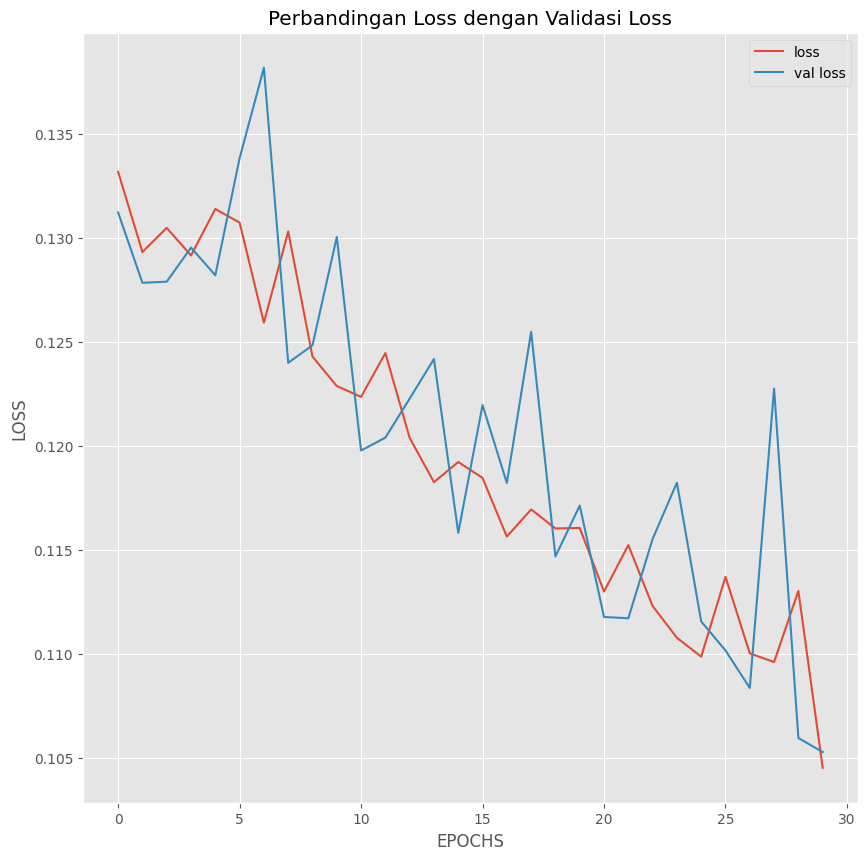

In [150]:
plt.figure(figsize = (10,10))

plt.style.use('ggplot')
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label='val loss')

plt.title("Perbandingan Loss dengan Validasi Loss")
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.legend()

plt.show()

#### MENAMPILKAN GAMBARAN TINGKAT PERBANDINGAN ANTARA AKURASI DENGAN VALIDASI AKURASI

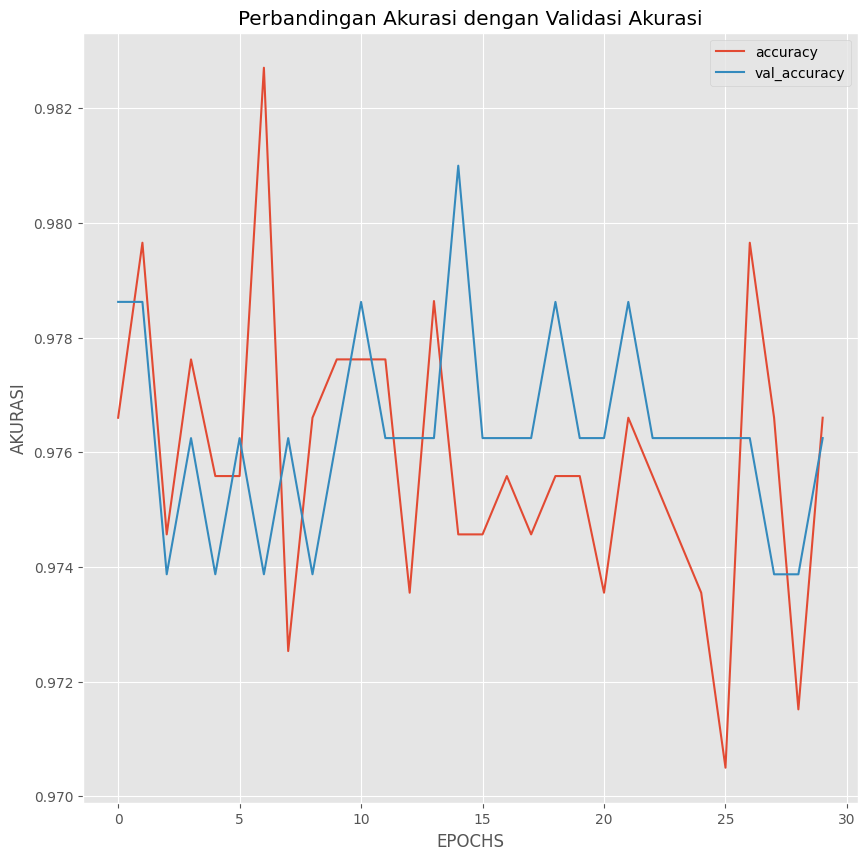

In [151]:
plt.figure(figsize = (10,10))

plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

plt.title("Perbandingan Akurasi dengan Validasi Akurasi")
plt.xlabel("EPOCHS")
plt.ylabel("AKURASI")
plt.legend()

plt.show()

### SELESAI

### TERIMA KASIH